# Lung Cancer with KNN

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
r_cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
lung_data = pd.read_csv('Datasets\\lung-cancer.data', names=r_cols, encoding='latin-1')

In [30]:
lung_data

1  2  3  4  5  6  7  8  9  10  ...  48  49  50  51  52  53  54  55  56  57
0   1  0  3  0  2  0  2  2  2   1  ...   2   2   2   2   2   1   1   1   2   2
1   1  0  3  3  1  0  3  1  3   1  ...   2   2   2   2   2   2   2   1   2   2
2   1  0  3  3  2  0  3  3  3   1  ...   2   2   2   2   2   2   2   2   1   2
3   1  0  2  3  2  1  3  3  3   1  ...   2   2   2   2   2   2   2   2   2   2
4   1  0  3  2  1  1  3  3  3   2  ...   2   2   2   2   2   2   2   1   2   2
5   1  0  3  3  2  0  3  3  3   1  ...   2   2   2   2   2   2   2   2   1   2
6   1  0  3  2  1  0  3  3  3   1  ...   2   2   2   2   1   2   2   2   1   2
7   1  0  2  2  1  0  3  1  3   3  ...   2   2   1   2   2   2   2   1   2   2
8   1  0  3  1  1  0  3  1  3   1  ...   2   2   2   2   2   2   2   1   2   2
9   2  0  2  3  2  0  2  2  2   1  ...   2   2   2   1   3   2   1   1   2   2
10  2  0  2  2  0  0  3  2  3   1  ...   2   2   2   2   2   2   2   2   2   2
11  2  0  2  3  2  0  1  2  1   1  ...   2   2   2   2   2   1   1   2   2   1
12  2  0  2  1  1  0  1  2  2   1  ...   2   2   2   2   2   2   2   1   2   2
13  2  0  2  2  1  1  2  3  3   1  ...   2   2   2   2   2   1   1   1   2   2
14  2  1  3  0  2  1  1  2  2   1  ...   2   2   2   2   2   2   2   1   2   1
15  2  0  3  2  2  1  2  2  2   1  ...   2   2   2   2   2   2   2   2   2   2
16  2  0  3  2  2  0  1  1  3   1  ...   2   2   2   2   2   2   2   1   2   2
17  2  0  2  1  1  0  2  1  3   1  ...   2   2   2   2   2   1   1   1   2   2
18  2  0  2  0  2  0  2  3  3   3  ...   2   2   2   2   2   2   2   2   1   2
19  2  0  1  2  1  0  3  3  3   1  ...   2   2   2   2   2   1   1   2   2   1
20  2  0  2  0  2  1  3  3  3   1  ...   2   2   2   2   1   2   2   1   2   2
21  2  0  3  3  2  0  2  1  3   1  ...   2   2   1   2   2   2   2   2   1   2
22  3  0  2  3  1  1  2  2  1   1  ...   3   3   3   3   1   3   3   2   2   1
23  3  0  2  3  1  1  1  2  1   1  ...   2   2   2   2   2   2   2   2   2   1
24  3  0  3  3  1  0  3  3  1   1  ...   2   2   2   2   3   2   2   2   2   1
25  3  0  2  3  2  0  1  2  2   1  ...   2   2   2   1   3   1   2   2   1   2
26  3  0  2  2  2  0  2  1  2   1  ...   2   2   2   2   2   2   2   1   2   1
27  3  0  2  2  1  0  2  2  2   1  ...   3   3   2   2   3   2   2   2   2   1
28  3  0  3  2  2  0  2  2  2   1  ...   2   2   2   3   1   2   2   2   2   2
29  3  0  2  1  1  0  2  2  1   1  ...   2   2   3   2   2   2   2   2   2   1
30  3  0  2  3  2  1  2  2  3   1  ...   2   2   2   2   2   2   2   1   2   2
31  3  0  2  3  1  0  2  3  3   1  ...   2   2   2   2   2   2   2   2   2   2

[32 rows x 57 columns]

## Step 1. Preprocessing

###  Step 1.0 Features vs Labels(classes)

In [31]:
classes = lung_data.iloc[:, 0].values
features = lung_data.iloc[:, 1:].values

In [32]:
print(classes.shape)
print(features.shape)

(32,)
(32, 56)


### Step 1.1 Finding the best features

Because we have 56 different feautres, for each sample, we want to know what are those features which are the most relevant for our 
classification.

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
etc = ExtraTreesClassifier(n_estimators=300)
etc.fit(features, classes)

ExtraTreesClassifier(n_estimators=300)

In [35]:
print(etc.feature_importances_)
indices = np.argsort(etc.feature_importances_)[::-1]

[0.00123    0.03201048 0.03067239 0.01634114 0.00757081 0.0780435
 0.01130019 0.02490096 0.00386826 0.02140095 0.00961519 0.01440875
 0.02103166 0.02629    0.01136677 0.0102727  0.00726184 0.00664823
 0.06164184 0.0622902  0.00908665 0.00414255 0.04396725 0.00619438
 0.00980076 0.00932116 0.0236832  0.0220083  0.01222913 0.01484357
 0.01421918 0.01692361 0.02794563 0.02699954 0.02230228 0.01298834
 0.03278577 0.01137159 0.01117027 0.0248201  0.01033151 0.01123238
 0.00841172 0.00973908 0.00706101 0.01857721 0.00359962 0.00372132
 0.00727159 0.00457105 0.00835255 0.01496668 0.03287794 0.01607044
 0.00504309 0.0232037 ]


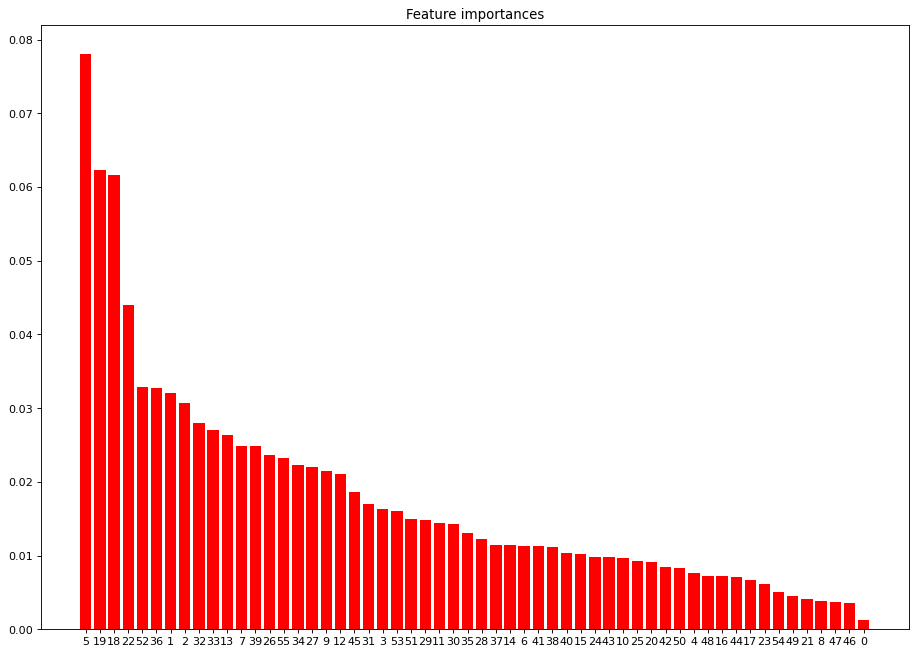

In [36]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(features.shape[1]), etc.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.show()

### Step 1.2 Scaling data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(np.float64(features))

### Step 1.3 Train and test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.2)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, classes, test_size=0.2)

In [41]:
print("X_train shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_train shape --> (25, 56)
y_train shape --> (25,)
X_test shape --> (7, 56)
y_test shape --> (7,)


## Step 2 Predicting

### Step 2.1 K Nearest Neighbors

One of the algorithm tested by Hong and Young was KNN. They achieved 77% accuracy with that algorithm.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#### 2.1.1 Test on the unscaled data

In [45]:
for i in range(1, 27):
    model = KNeighborsClassifier(n_neighbors = i, p = 2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("k =",i)
    print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
    print("Precision: %.2f %%" %(100*precision_score(y_test, y_pred,average='macro')))
    print("Recall: %.2f %%" %(100*recall_score(y_test, y_pred,average='macro')))
    print("\n")

k = 1
Accuracy: 14.29 %
Precision: 11.11 %
Recall: 16.67 %


k = 2
Accuracy: 0.00 %
Precision: 0.00 %
Recall: 0.00 %


k = 3
Accuracy: 28.57 %
Precision: 33.33 %
Recall: 33.33 %


k = 4
Accuracy: 14.29 %
Precision: 16.67 %
Recall: 16.67 %


k = 5
Accuracy: 28.57 %
Precision: 33.33 %
Recall: 33.33 %


k = 6
Accuracy: 28.57 %
Precision: 33.33 %
Recall: 33.33 %


k = 7
Accuracy: 71.43 %
Precision: 58.33 %
Recall: 58.33 %


k = 8
Accuracy: 42.86 %
Precision: 50.00 %
Recall: 41.67 %


k = 9
Accuracy: 28.57 %
Precision: 44.44 %
Recall: 25.00 %


k = 10
Accuracy: 42.86 %
Precision: 50.00 %
Recall: 41.67 %


k = 11
Accuracy: 28.57 %
Precision: 44.44 %
Recall: 25.00 %


k = 12
Accuracy: 28.57 %
Precision: 44.44 %
Recall: 25.00 %


k = 13
Accuracy: 42.86 %
Precision: 50.00 %
Recall: 33.33 %


k = 14
Accuracy: 28.57 %
Precision: 44.44 %
Recall: 25.00 %


k = 15
Accuracy: 28.57 %
Precision: 44.44 %
Recall: 25.00 %


k = 16
Accuracy: 28.57 %
Precision: 44.44 %
Recall: 25.00 %


k = 17
Accuracy: 28.

C:\Users\trant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\trant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 25, n_neighbors = 26